In [2]:
from matplotlib import pyplot
import matplotlib.patches as mpatches

In [3]:
# Some constants
MAX_TEST = 1300
MAX_HW = 3400
MAX_SEMESTER = 4700
FOR_BEST_MARK = 3900
PERCENT_SEGMENTS_TO_MARK_WITH_COLOR = {
    (0, 49): (2, "red"), 
    (50, 65): (3, "orange"), 
    (66, 89): (4, "yellow"), 
    (90, 100): (5, "green")
}

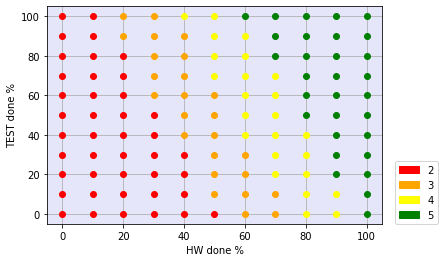

In [10]:
def get_points(percent, max_points):
    return percent * max_points // 100;

def get_percent(points, max_points, occuracy):
    return min(round(points * 100 / occuracy / max_points) * occuracy, 100)

def add_legend():
    patches = [
        mpatches.Patch(label = mark_with_color[0], color = mark_with_color[1]) 
        for mark_with_color in PERCENT_SEGMENTS_TO_MARK_WITH_COLOR.values()
    ] 
    pyplot.legend(handles = patches, loc = (1.04, 0))

def prepare_pyplot():
    pyplot.clf()
    pyplot.axes().set_facecolor("lavender")
    pyplot.xlabel("HW done %")
    pyplot.ylabel("TEST done %")
    add_legend()
    pyplot.grid()

prepare_pyplot()

for hw_percent in range(0, 101, 10):
    for test_percent in range(0, 101, 10):
        hw_points = get_points(hw_percent, MAX_HW)
        test_points = get_points(test_percent, MAX_TEST)
        total_points = hw_points + test_points
        
        total_percent = get_percent(total_points, FOR_BEST_MARK, 10)
        
        percent_segment = list(
            filter(
                lambda segment: segment[0] <= total_percent and total_percent <= segment[1], 
                PERCENT_SEGMENTS_TO_MARK_WITH_COLOR.keys()
            )
        )[0]
        
        color = PERCENT_SEGMENTS_TO_MARK_WITH_COLOR[percent_segment][1]
        pyplot.plot(hw_percent, test_percent, 'o', color = color)

pyplot.show()

Видно, что области оценок 3, 4, 5 занимают примерно одинаковое пространство (на самом деле пятерок немногим больше), в том время как двойки занимают почти в два раза большее пространство. 
Как мне кажется, оценивание достаточно справедливое в районе большого процента выполнения ДЗ. Например, возможно получить максимальный бал выполняя все дз, но в тоже время не приходя на тест, так как это будет не более чем тратой времени. Если же не хватало времени на выполнение ДЗ, но ты хорошо знаешь материал, то можно получить 4, хорошо написав тест. Однако кажется странным, что человек, который написал тест на максимальный балл, тем самым подтвердив свои знания, все равно получает минимальный балл, как и тот, который не делал вообще ничего